### ***EDA and Stats***

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load the dataset
# file_path = ('/Bankruptcy (2).xlsx')
df = pd.read_excel('Bankruptcy (2).xlsx')

In [7]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)  # Check number of rows and columns

Dataset Shape: (250, 7)


In [8]:
print("First 5 rows of the dataset:\n", df.head())  # Display first few rows

First 5 rows of the dataset:
    industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   
2              1.0              0.0                    0.0          0.0   
3              0.5              0.0                    0.0          0.5   
4              1.0              1.0                    0.0          0.0   

   competitiveness  operating_risk       class  
0              0.0             0.5  bankruptcy  
1              0.0             1.0  bankruptcy  
2              0.0             1.0  bankruptcy  
3              0.0             1.0  bankruptcy  
4              0.0             1.0  bankruptcy  


In [9]:
print("\nData Types:\n", df.dtypes)  # Check data types of columns


Data Types:
 industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
class                     object
dtype: object


In [10]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())  # Identify missing values


Missing Values:
 industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64


In [11]:
# Check class distribution
print("\nClass Distribution:\n", df['class'].value_counts())  # Check distribution of target variable


Class Distribution:
 class
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64


In [12]:
# Statistical Summary of the dataset
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
        industrial_risk  management_risk  financial_flexibility  credibility  \
count       250.000000       250.000000             250.000000   250.000000   
mean          0.518000         0.614000               0.376000     0.470000   
std           0.411526         0.410705               0.401583     0.415682   
min           0.000000         0.000000               0.000000     0.000000   
25%           0.000000         0.500000               0.000000     0.000000   
50%           0.500000         0.500000               0.500000     0.500000   
75%           1.000000         1.000000               0.500000     1.000000   
max           1.000000         1.000000               1.000000     1.000000   

       competitiveness  operating_risk  
count       250.000000      250.000000  
mean          0.476000        0.570000  
std           0.440682        0.434575  
min           0.000000        0.000000  
25%           0.000000        0.000000  
50%           0.500

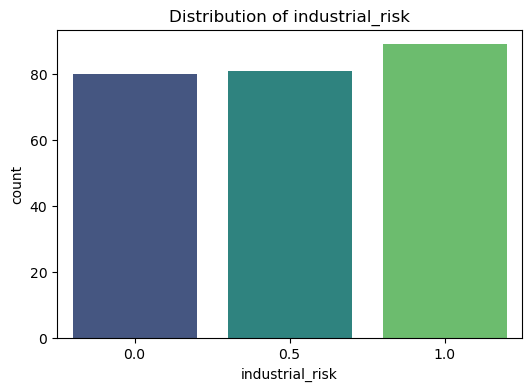

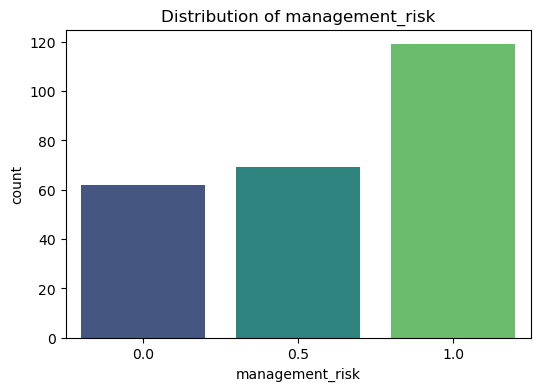

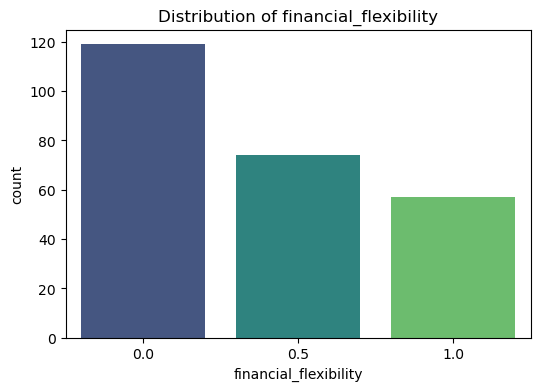

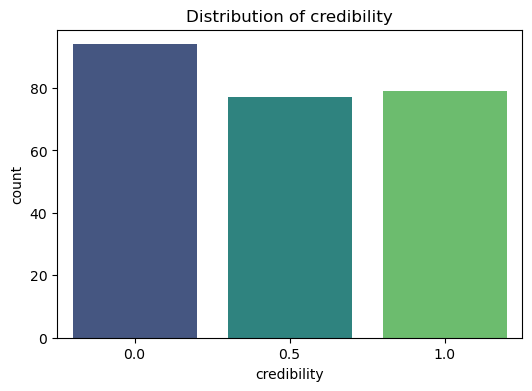

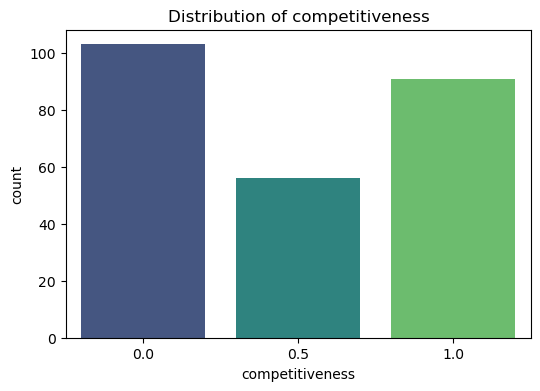

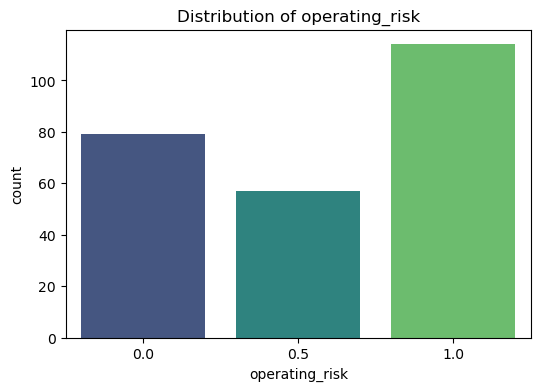

In [13]:
# Univariate Analysis (Distribution of features)
for col in df.columns[:-1]:  # Exclude the target column
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.show()


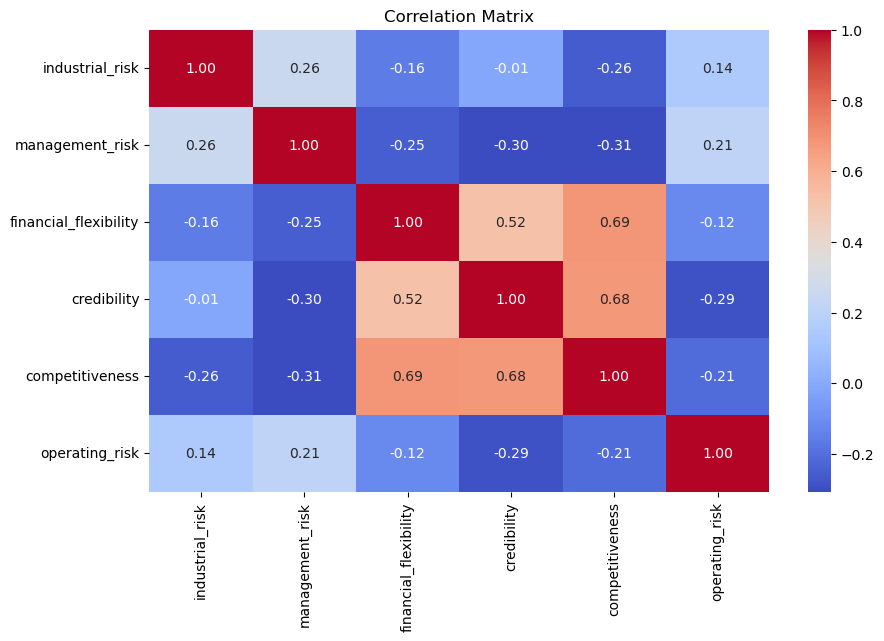

In [14]:

# Check correlations between features
plt.figure(figsize=(10, 6))
# Include only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

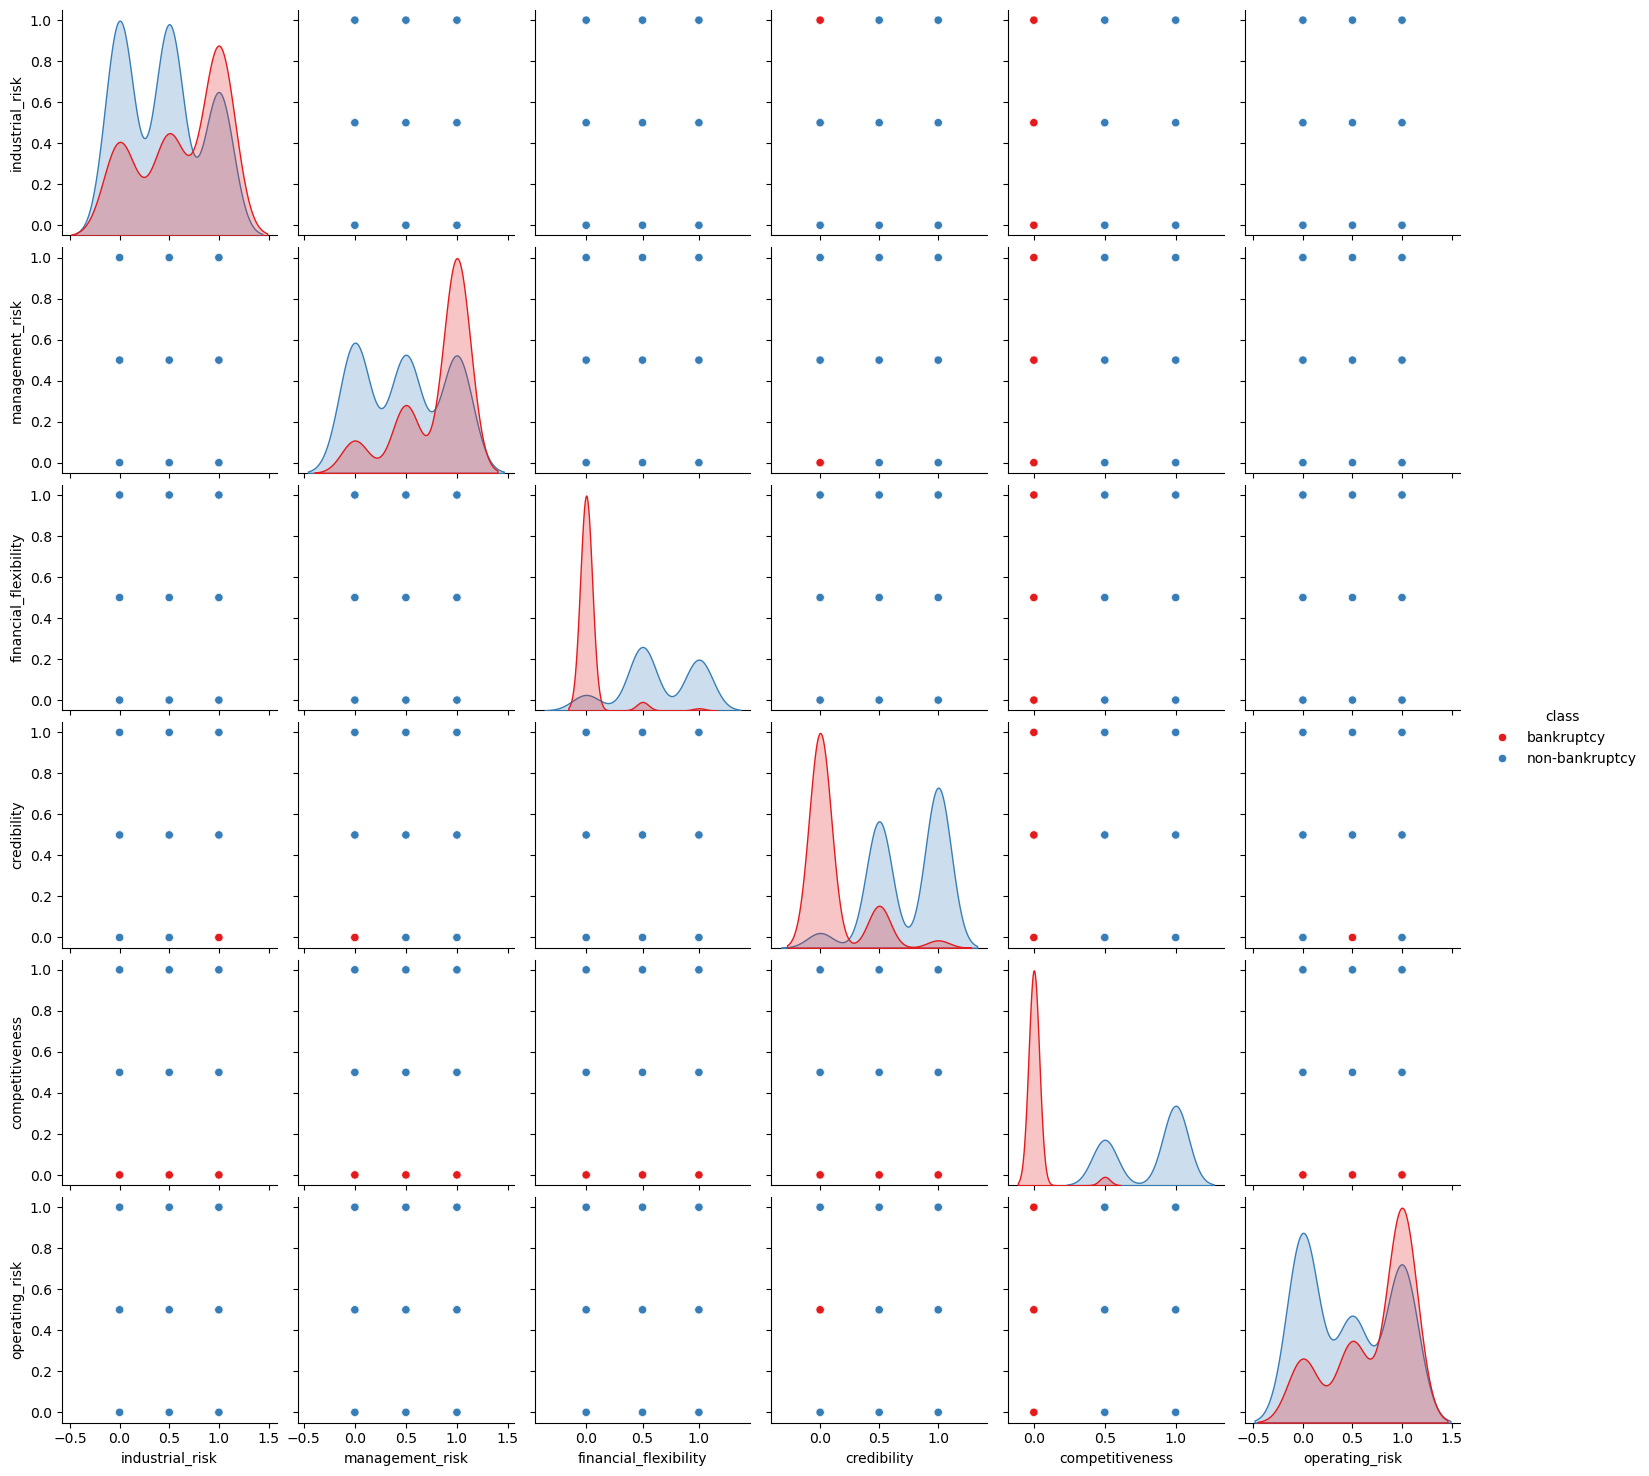

In [15]:
# Pairplot to visualize relationships
sns.pairplot(df, hue='class', palette='Set1')
plt.show()

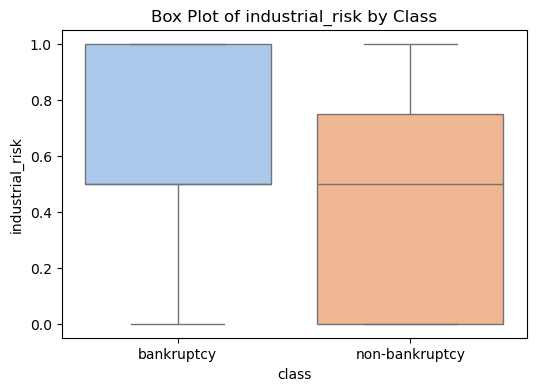

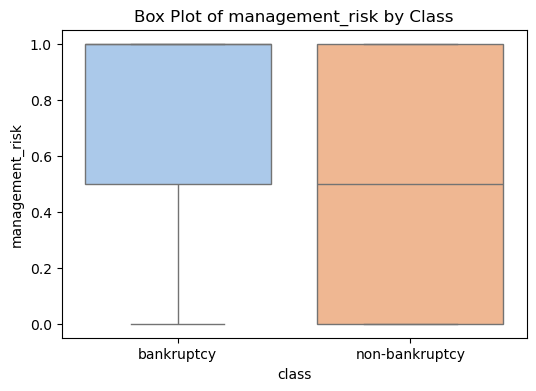

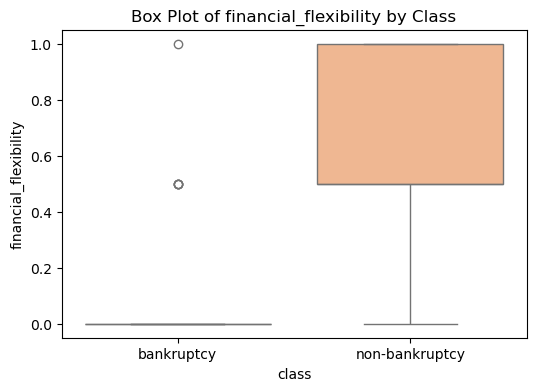

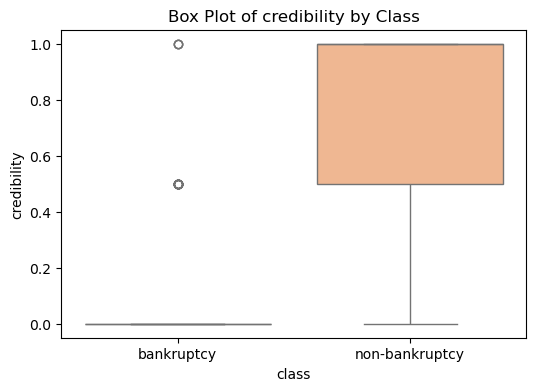

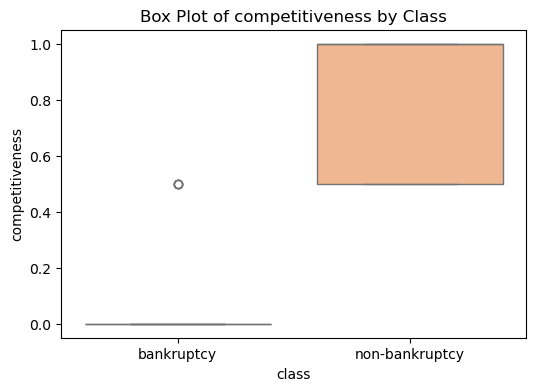

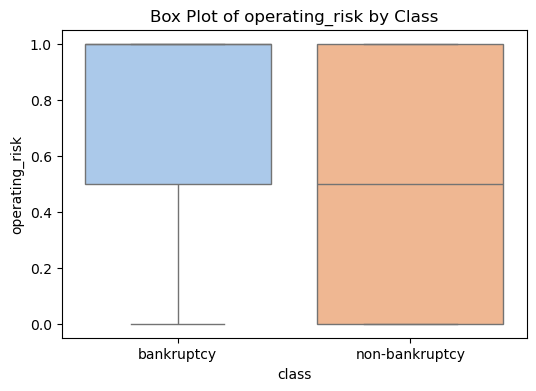

In [16]:
# Box Plot Analysis
for col in df.columns[:-1]:  # Exclude the target column
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='class', y=col, data=df, palette='pastel')
    plt.title(f'Box Plot of {col} by Class')
    plt.show()

### ***Model Building***

In [18]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [19]:
# Splitting features and target variable
X = df.drop('class', axis=1)  # Features
y = df['class']  # Target

In [20]:
# Encode target variable (if not numeric)
y = y.map({'non-bankruptcy': 0, 'bankruptcy': 1})  # Convert target to binary

In [21]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

In [22]:
# Standardizing the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Dictionary to store models and their results
results = {}
result = {}

In [24]:
# Test
joblib.dump(X_test_scaled, "X_test_scaled.pkl")
joblib.dump(y_test, "y_test.pkl")

['y_test.pkl']

#### Logistic Regression

In [26]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
y_pred_lr = lr.predict(X_test_scaled)

In [28]:
results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1-Score': f1_score(y_test, y_pred_lr),
    'ROC-AUC': roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1])
}

In [29]:
result['Logistic Regression'] = {
    'Predictions': y_pred_lr,
    'Probabilities': lr.predict_proba(X_test_scaled)[:, 1]
}

In [30]:
joblib.dump(lr, 'logistic_model.pkl')
print("Model saved successfully!")

Model saved successfully!


#### Random Forest

In [32]:
rf = RandomForestClassifier(random_state=55)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=55)

In [33]:
y_pred_rf = rf.predict(X_test)

In [34]:
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
}

In [35]:
result['Random Forest'] = {
    'Predictions': y_pred_rf,
    'Probabilities': rf.predict_proba(X_test_scaled)[:, 1]
}

In [36]:
joblib.dump(rf, 'random_forest_model.pkl')
print("Model saved successfully!")

Model saved successfully!


#### Support Vector Machine

In [38]:
svm = SVC(probability=True, random_state=66)
svm.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=66)

In [39]:
y_pred_svm = svm.predict(X_test_scaled)

In [40]:
results['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1-Score': f1_score(y_test, y_pred_svm),
    'ROC-AUC': roc_auc_score(y_test, svm.predict_proba(X_test_scaled)[:, 1])
}

In [41]:
result['SVM'] = {
    'Predictions': y_pred_svm,
    'Probabilities': svm.predict_proba(X_test_scaled)[:, 1]
}

In [42]:
joblib.dump(svm, 'svm_model.pkl')
print("Model saved successfully!")

Model saved successfully!


#### K-Nearest Neighbors

In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [45]:
y_pred_knn = knn.predict(X_test_scaled)

In [46]:
results['KNN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'F1-Score': f1_score(y_test, y_pred_knn),
    'ROC-AUC': roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])
}

In [47]:
result['KNN'] = {
    'Predictions': y_pred_knn,
    'Probabilities': knn.predict_proba(X_test_scaled)[:, 1]
}

In [48]:
joblib.dump(knn, 'knn_model.pkl')
print("Model saved successfully!")

Model saved successfully!


#### XGBoost

In [50]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=35)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=35, ...)

In [51]:
y_pred_xgb = xgb.predict(X_test)

In [52]:
results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1-Score': f1_score(y_test, y_pred_xgb),
    'ROC-AUC': roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])
}

In [53]:
result['XGBoost'] = {
    'Predictions': y_pred_xgb,
    'Probabilities': xgb.predict_proba(X_test_scaled)[:, 1]
}

In [54]:
joblib.dump(xgb, 'xgboost_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [55]:
for model, metrics in results.items():
    print(f"\n{model} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")


Logistic Regression Performance:
Accuracy: 0.99
Precision: 1.00
Recall: 0.97
F1-Score: 0.99
ROC-AUC: 1.00

Random Forest Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
ROC-AUC: 1.00

SVM Performance:
Accuracy: 0.99
Precision: 1.00
Recall: 0.97
F1-Score: 0.99
ROC-AUC: 1.00

KNN Performance:
Accuracy: 0.95
Precision: 0.93
Recall: 0.97
F1-Score: 0.95
ROC-AUC: 0.99

XGBoost Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
ROC-AUC: 1.00


## ***Model Evaluation***

In [57]:
# Convert results dictionary to DataFrame for easier visualization
results_df = pd.DataFrame(results).T

#### Plotting ROC Curves

In [59]:
from sklearn.metrics import roc_curve

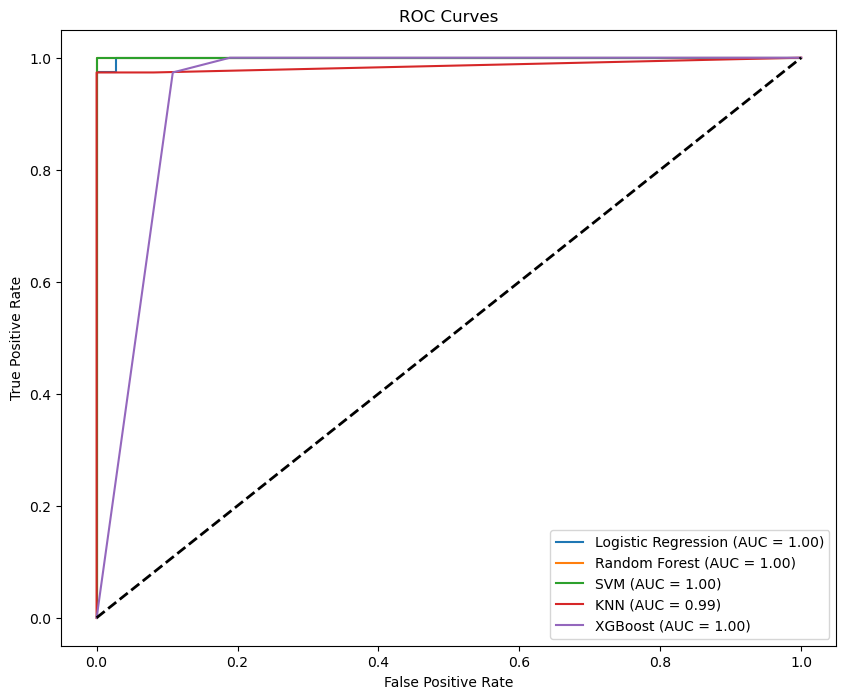

In [60]:
plt.figure(figsize=(10, 8))
models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'SVM': svm,
    'KNN': knn,
    'XGBoost': xgb
}

for model_name, model in models.items():
    if model_name in ['Logistic Regression', 'Random Forest', 'XGBoost']:
        y_proba = model.predict_proba(X_test_scaled if model_name != 'Random Forest' else X_test)[:, 1]
    else:
        y_proba = model.predict_proba(X_test_scaled)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {results[model_name]["ROC-AUC"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

#### Bar Plot

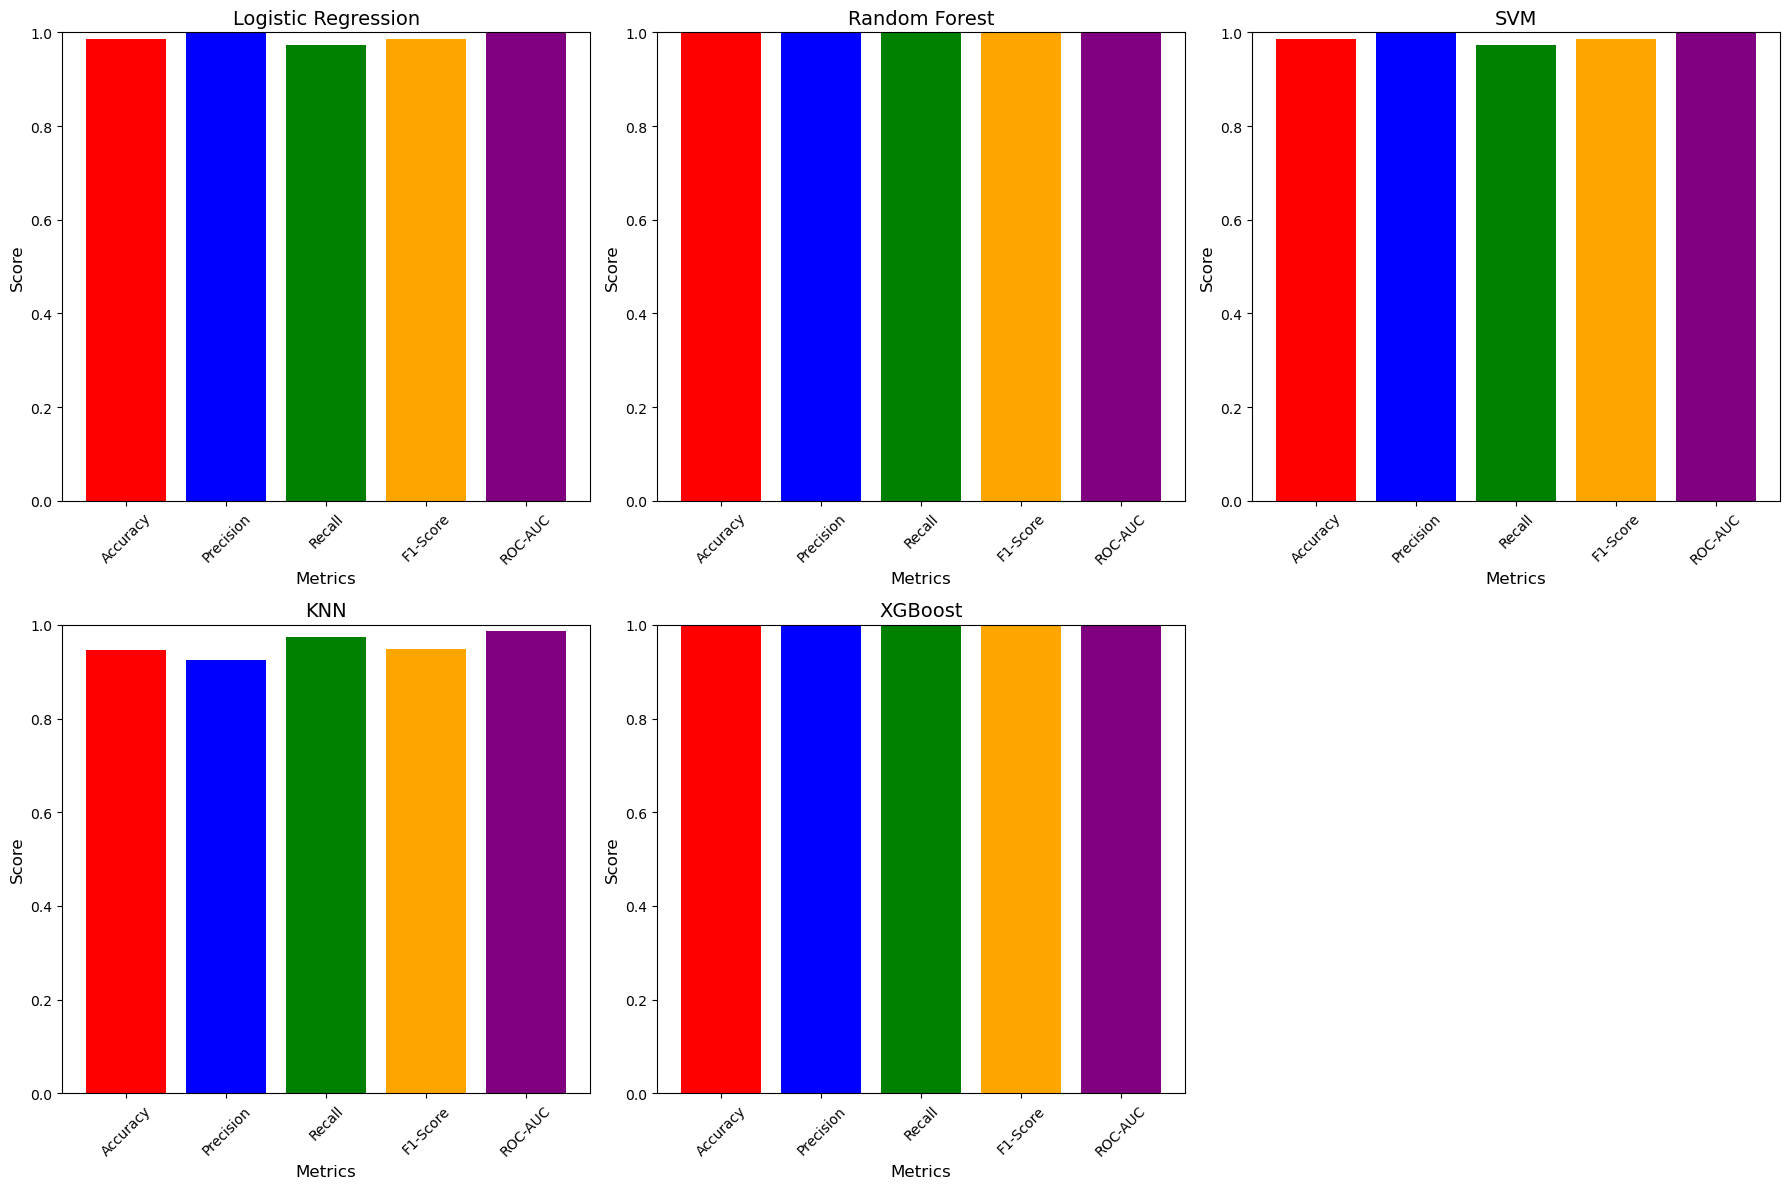

In [62]:
num_models = len(results)

colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))  
axes = axes.flatten() 


for i, (model, metrics) in enumerate(results.items()):
    plot_metrics = {k: v for k, v in metrics.items() if k not in ['Predictions', 'Probabilities']}
    
    metric_values = list(plot_metrics.values())  
    metric_names = list(plot_metrics.keys())     
    
    axes[i].bar(metric_names, metric_values, color=colors[:len(plot_metrics)]) 

    axes[i].set_title(model, fontsize=14)
    axes[i].set_ylim(0, 1) 
    axes[i].set_ylabel('Score', fontsize=12)
    axes[i].set_xlabel('Metrics', fontsize=12)

    axes[i].tick_params(axis='x', rotation=45)

for j in range(len(results), len(axes)):
    fig.delaxes(axes[j]) 

plt.tight_layout()
plt.show()

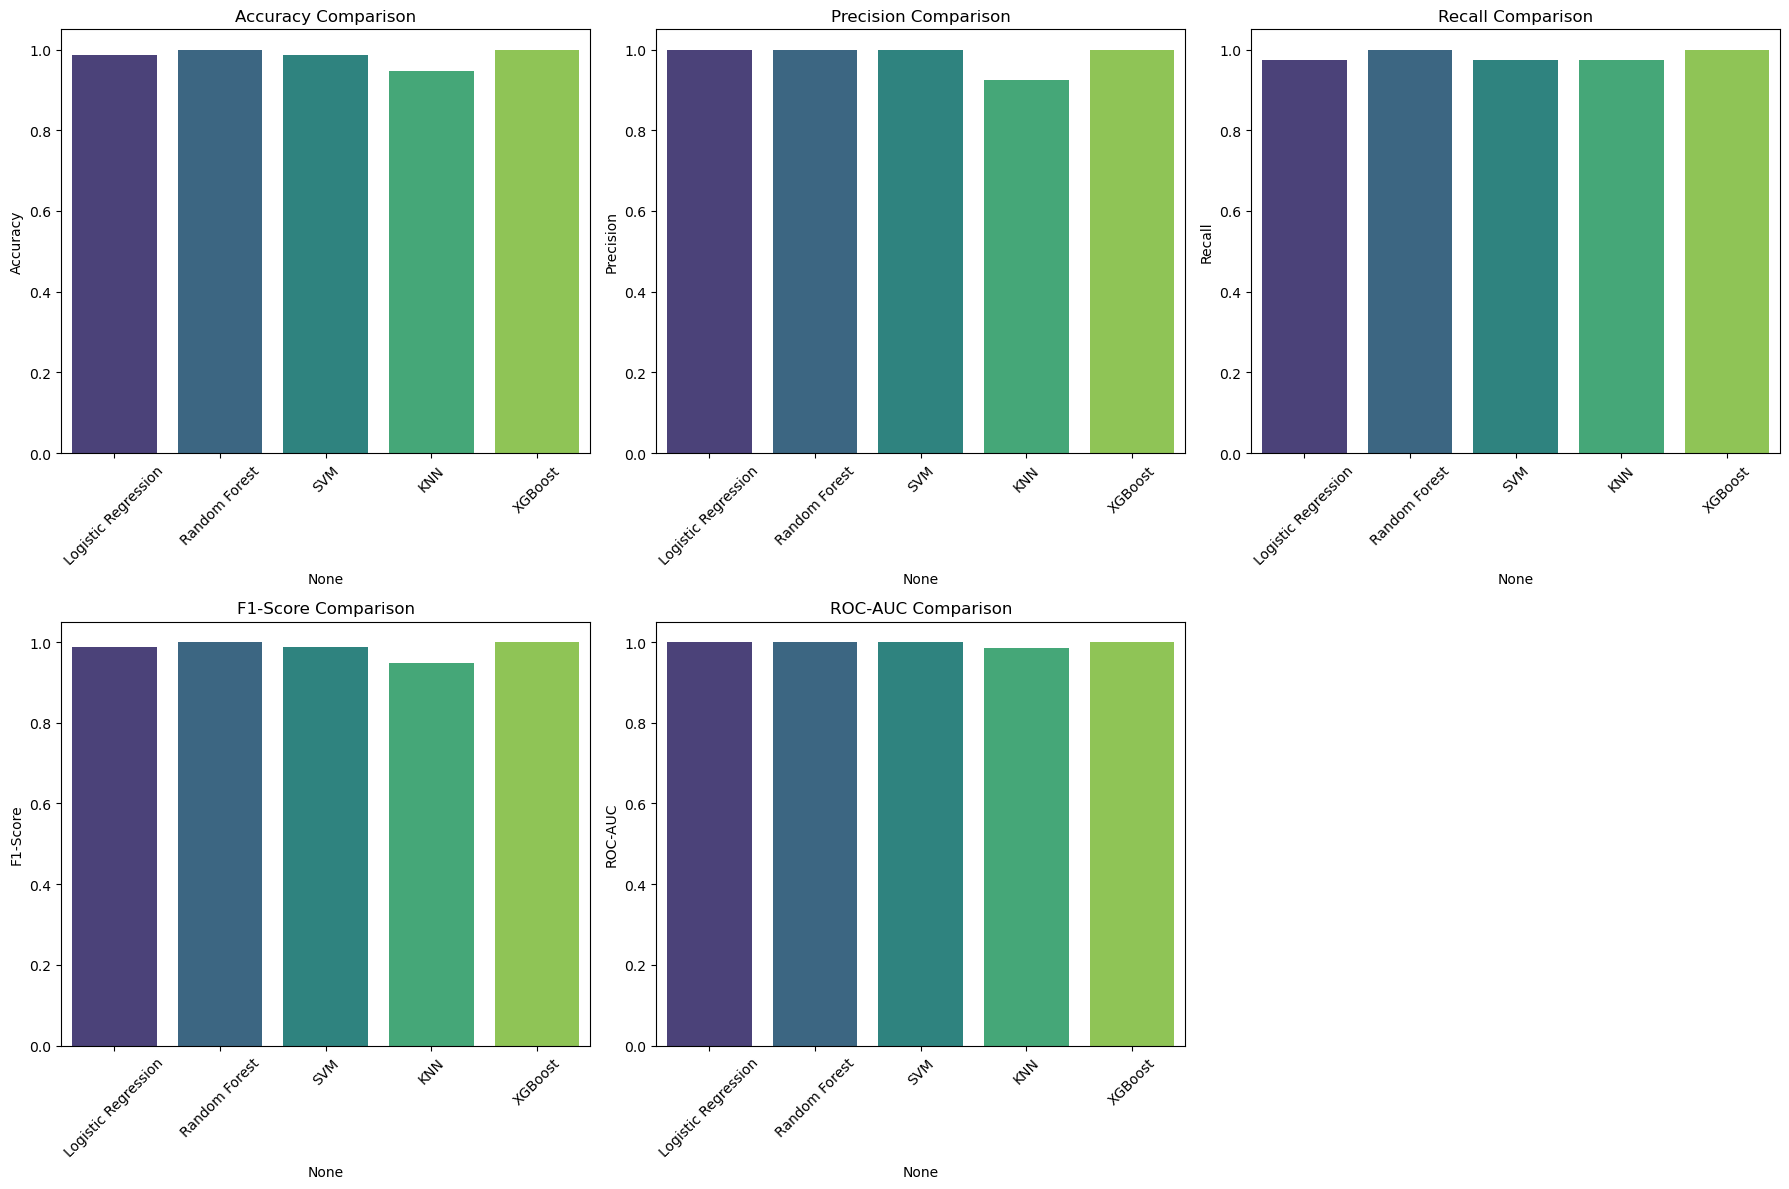

In [63]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))  
axes = axes.flatten() 

if len(metrics) == 1:
    axes = [axes]

for i, metric in enumerate(metrics):
    sns.barplot(x=results_df.index, y=results_df[metric], ax=axes[i], palette="viridis")
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xticklabels(results_df.index, rotation=45)

for j in range(len(results), len(axes)):
    fig.delaxes(axes[j]) 

plt.tight_layout()
plt.show()

#### Comfusion Matrix

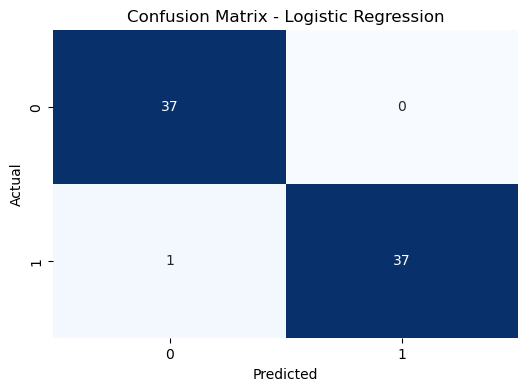

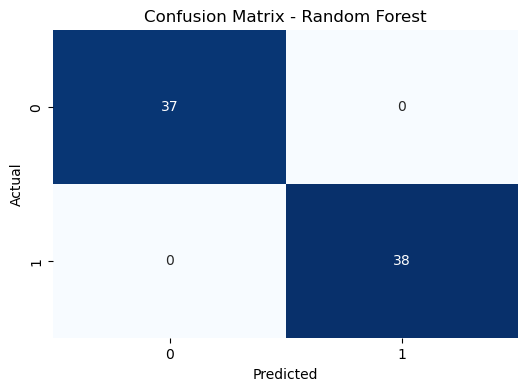

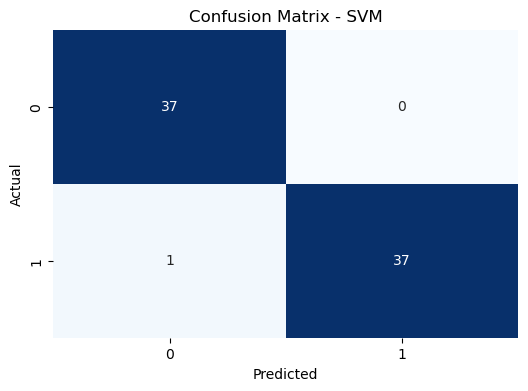

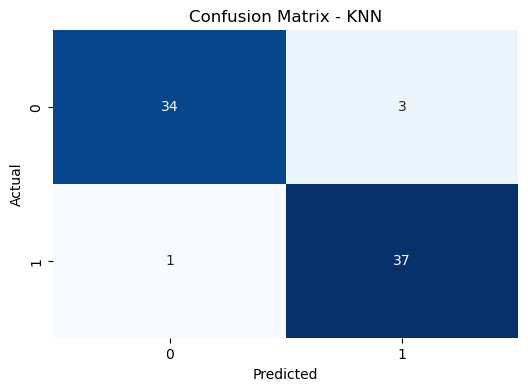

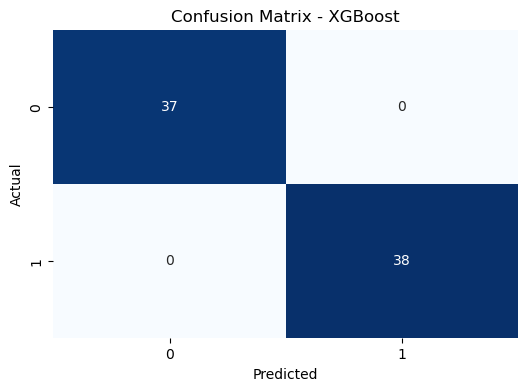

In [65]:
from sklearn.metrics import confusion_matrix  

for model_name, model in result.items():
    y_pred = model['Predictions'] 
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [66]:
# Identify the best-performing model based on F1-Score
best_model = results_df['F1-Score'].idxmax()
print(f"The best-performing model is: {best_model} with F1-Score: {results_df.loc[best_model, 'F1-Score']:.2f}")

The best-performing model is: Random Forest with F1-Score: 1.00


## ***Model Deployment***

In [68]:
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved successfully!")

Scaler saved successfully!


In [ ]:
!streamlit run app.py